# Introduction to networkx
For more comprehensive introduction, please go to https://networkx.org/documentation/stable/tutorial.html

In [56]:
# importing the networkx as nx
import networkx as nx

## Initializing a graph
There can be four types of graph in networkx, which are initialized using the following commands:
<ol>
  <li>Undirected graph: Initialized using <code>G = nx.graph()</code></li>
  <li>Directed graph: Initialized using <code>G = nx.DiGraph()</code></li>
  <li>Undirected multiGraph (multiple edges allowed between two nodes): Initialized using <code>G = nx.MultiGraph()</code></li>
  <li>Directed multiGraph (multiple edges allowed between two nodes): Initialized using <code>G = nx.MultiDiGraph()</code></li>
</ol> 

In this class, we'll never talk about 3 and 4 types.

In [62]:
G = nx.DiGraph()

## Nodes

In [63]:
# It is time to add nodes.
G.add_node(1) # Add a single node
G.add_nodes_from([2, 3, 6]) # Add nodes from a list
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
]) # Add nodes with attributes



## Edges

In [64]:
# It is time to add edges
G.add_edge(1, 2) # adding a single edge
G.add_edges_from([(1, 2), (1, 3), (4, 5), (1, 5)]) # One can add edges from a list
G.remove_edge(1, 5) # Removing an edge
G.remove_node(6) # It will also remove the edges associated to that node

## Getting information about the graph

In [99]:
print(G) # Overall information about the graph
print("nodes in the graph", G.nodes) # To print all the nodes in the graph
print("edges in the graph", G.edges) # To print all the nodes in the graph
print("# of nodes: %d"%G.number_of_nodes()) # print only no of nodes
print("# of edges: %d"%G.number_of_edges()) # print only no of edges
print("List of neighbors of node 1:", list(G.adj[1])) # Printing the neighbors of node 1
print(list(G.successors(1))) # Printing the forward star of node 1
print(list(G.predecessors(1))) # Printing the backward star of node 1
print("Indegree of node 1 is %d"%G.in_degree[1]) # Printing the indegree of node 1
print("Outdegree of node 1 is %d"%G.out_degree[1]) # Printing the outdegree of node 1

DiGraph named 'Tutorial graph' with 5 nodes and 3 edges
nodes in the graph [1, 2, 3, 4, 5]
edges in the graph [(1, 2), (1, 3), (4, 5)]
# of nodes: 5
# of edges: 3
List of neighbors of node 1: [2, 3]
[2, 3]
[]
Indegree of node 1 is 0
Outdegree of node 1 is 2


## Adding attributes
Sometimes, we need to specify certain attributes to the nodes and edges. For example, we may need to specify the cost of traversing a link, capacity of a link, etc. 

In [82]:
# Let's try to assign a color to each link in the graph
colors = {(1, 2):'red', (1, 3):'blue', (4, 5):'green'}
for n1,n2 in list(G.edges):
    G[n1][n2]["color"] = colors[n1, n2]
    
print(G.edges[1, 2]["color"]) # One can always retreive the attribute like this. 

red


In [85]:
# Let's name (an attribute) the graph
G.graph["name"] = "Tutorial graph"

In [92]:
# let's add new labels (attribute) for the nodes
labels = {1: 'A', 2: 'B', 3: 'D', 4: 'E', 5: 'C'}
for n in G.nodes:
    G.nodes[n]["label"] = labels[1]
print(G.nodes[3]["label"]) # One can always retreive the label like this. 

A


## Drawing graphs

{1: array([0.21909718, 0.72021216], dtype=float32), 2: array([0.7303278 , 0.21022327], dtype=float32), 3: array([0.45499417, 0.38804942], dtype=float32), 4: array([0.83372957, 0.4141777 ], dtype=float32), 5: array([0.91420275, 0.9308132 ], dtype=float32)}


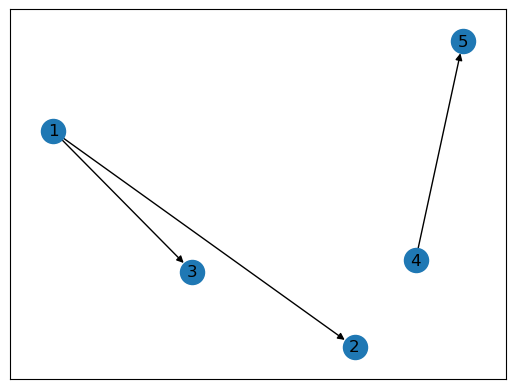

In [136]:
import matplotlib.pyplot as plt # We need matplotlib pyplot for this purpose
pos = nx.random_layout(G) # To get the coordinates of nodes
nx.draw_networkx(G, with_labels=True, pos=pos) # We specify the graph, position, etc.

## Excercise: Importing a transportation network and drawing

import pandas as pd
import requests

nodes_url = 'https://github.com/bstabler/TransportationNetworks/blob/master/Chicago-Sketch/ChicagoSketch_node.tntp'
links_url = 'https://github.com/bstabler/TransportationNetworks/blob/master/Chicago-Sketch/ChicagoSketch_net.tntp'
nodes_data = requests.get(nodes_url).json() # Requesting the nodes data
links_data = requests.get(links_url).json() # Requesting the links data

In [203]:
pos= {} # Node positions
for line in nodes_data['payload']['blob']['rawLines'][1:]: # This is where the data we need is stored
    line_content = line.split("\t") # The content is tab seperated
    pos[line_content[0]] = [float(line_content[1]), float(line_content[2])] # Pushing the node and its coordinates into the "pos" dictionary

In [204]:
# Storing the network
chicago_net = nx.DiGraph()
for line in links_data['payload']['blob']['rawLines'][9:]: # This is where the data we need is stored
    line_content = line.split("\t") # The content is tab seperated
    chicago_net.add_edge(line_content[1], line_content[2])

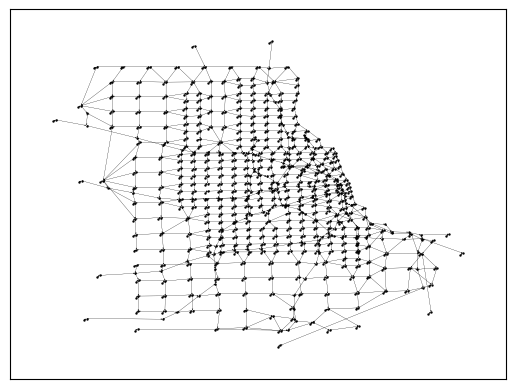

In [207]:
# Drawing the network
nx.draw_networkx(chicago_net, with_labels=False, node_size=0.5, node_color = 'black', width = 0.1, arrowsize=2, pos=pos) # We specify the graph, position, etc.
# Saving the network
plt.savefig("C:/Users/Pramesh Kumar/Desktop/chicago_net.png", dpi=300, format="PNG")
plt.show()